In [3]:
import utils
from utils import *

trainPath=r"C:\Users\sivateja_k\Desktop\NLP_Project\dataset\Reviews.csv"
review,sentiment,df=data_preprocess(trainPath)

resulting filtered data length after dropping rating 3 should be 525814
Filtered data length is 525814


In [ ]:

from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
get_accuracy(review,sentiment,CountVectorizer(),LogisticRegression(max_iter=1000),show_coefficients=True)

In [ ]:
#accuracy is around 92.25%, but some of the coefficients are not meaningful such as 6s so lets use TFIDF and see the accuracy
from sklearn.feature_extraction.text import TfidfVectorizer
get_accuracy(review,sentiment,TfidfVectorizer(),LogisticRegression(max_iter=300),show_coefficients=True)
#now we got accuracy of 92.49 but now top postive and negative words make sense

In [ ]:
get_accuracy(review,sentiment,TfidfVectorizer(ngram_range=(1,2)),LogisticRegression(max_iter=300),show_coefficients=True)
#now if you see words such as high recommend comes in positive words and waste money comes in negative words

In [ ]:
get_accuracy(review,sentiment,TfidfVectorizer(ngram_range=(1,3)),LogisticRegression(max_iter=300),show_coefficients=True)
#now if you see positive and negative words then it make more sense

In [4]:
#word2vec
import gensim.downloader as api
wv = api.load('word2vec-google-news-300')
wv[review[0].split()[1]]

array([ 1.66992188e-01, -5.41992188e-02, -8.74023438e-02,  1.96533203e-02,
       -2.42919922e-02, -2.51953125e-01,  4.76074219e-02, -7.95898438e-02,
        7.12890625e-02,  2.12890625e-01,  1.61132812e-01, -1.56250000e-01,
       -2.47070312e-01, -1.43554688e-01, -1.39648438e-01,  1.03515625e-01,
       -8.98437500e-02,  2.39257812e-01, -2.07031250e-01,  2.10937500e-01,
       -9.37500000e-02,  1.31835938e-01,  1.50390625e-01,  8.49609375e-02,
        2.22656250e-01,  1.90429688e-01, -3.34472656e-02,  1.23535156e-01,
       -1.95312500e-01, -5.20019531e-02,  1.37329102e-02,  1.23535156e-01,
       -2.83203125e-01,  1.31835938e-01,  1.82617188e-01, -6.19506836e-03,
        7.08007812e-02, -1.84570312e-01, -2.08984375e-01,  9.42382812e-02,
        1.11816406e-01,  1.45507812e-01,  6.98242188e-02, -2.13867188e-01,
       -1.58203125e-01, -1.86523438e-01, -3.29589844e-02,  1.24023438e-01,
       -2.75878906e-02, -7.59124756e-04,  9.81445312e-02, -1.87500000e-01,
        1.47460938e-01, -

364159
Accuracy : 0.8430085676625659
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     11434
           1       0.84      1.00      0.91     61398

    accuracy                           0.84     72832
   macro avg       0.42      0.50      0.46     72832
weighted avg       0.71      0.84      0.77     72832

======Confusion Matrix======

 [[    0 11434]
 [    0 61398]]


C:\Users\sivateja_k\Anaconda3\envs\nlpproject\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


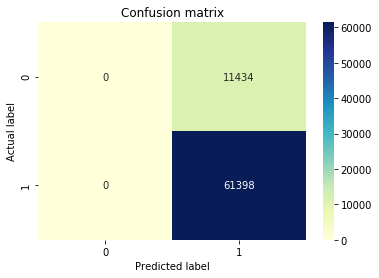

In [6]:
#########word2vec############

from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
import numpy as np
sentence_vectors=[]
for sentence in review:
    sentV=np.zeros(50)
    for word in sentence:
        try:
            vector=wv[word]
            sentV+=vector
        except:
            pass
    sentence_vectors.append(sentV)
print(len(sentence_vectors))

# This is word2vec+LR
review_train,review_test,target_train,target_test=train_test_split(sentence_vectors,sentiment,test_size=0.2,random_state=0)
final_model=LogisticRegression(max_iter=300).fit(review_train,target_train)
yhat=final_model.predict(review_test)
print("Accuracy :", np.mean(yhat == target_test))
print(classification_report(target_test, yhat))
confusionMatrix(target_test,yhat)

Accuracy : 0.8430085676625659
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     11434
           1       0.84      1.00      0.91     61398

    accuracy                           0.84     72832
   macro avg       0.42      0.50      0.46     72832
weighted avg       0.71      0.84      0.77     72832

======Confusion Matrix======

 [[    0 11434]
 [    0 61398]]


C:\Users\sivateja_k\Anaconda3\envs\nlpproject\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


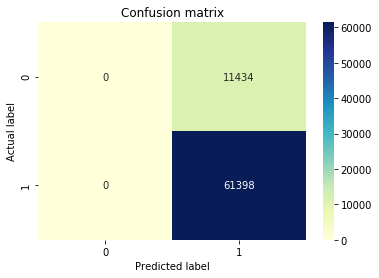

In [7]:
#Avg word2vec +LR
sentence_vectors=[]
for sentence in review:
    sentV=np.zeros(50)
    count=0
    for word in sentence:
        try:
            vector=wv[word]
            sentV+=vector
            count+=1
        except:
            pass
    if count!=0:
        sentV/=count
    sentence_vectors.append(sentV)
# This is word2vec+LR
review_train,review_test,target_train,target_test=train_test_split(sentence_vectors,sentiment,test_size=0.2,random_state=0)
final_model=LogisticRegression(max_iter=300).fit(review_train,target_train)
yhat=final_model.predict(review_test)
print("Accuracy :", np.mean(yhat == target_test))
print(classification_report(target_test, yhat))
confusionMatrix(target_test,yhat)

Accuracy : 0.8430085676625659
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     11434
           1       0.84      1.00      0.91     61398

    accuracy                           0.84     72832
   macro avg       0.42      0.50      0.46     72832
weighted avg       0.71      0.84      0.77     72832

======Confusion Matrix======


C:\Users\sivateja_k\Anaconda3\envs\nlpproject\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



 [[    0 11434]
 [    0 61398]]


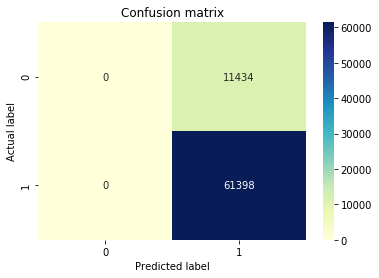

In [8]:
#tfidf+avgword2vec
tf_idf_vect=TfidfVectorizer(ngram_range=(1,2))
tf_idf_vect.fit_transform(review)
tfidf_feat=tf_idf_vect.get_feature_names()
tfidf_sent_vectors=[]
row=0
for sentence in review:
    sent_vec=np.zeros(300)
    weight_sum=0
    for word in sentence:
        try:
            vector=wv[word]
            vtfidf=final_tf_idf[row,tfidf_feat.index(word)]
            sent_vec+=(vec*tf_idf)
            weight_sum+=1
        except:
             pass
    if weight_sum!=0:
        sent_vec/=weight_sum
    tfidf_sent_vectors.append(sent_vec)
    row+=1
review_train,review_test,target_train,target_test=train_test_split(tfidf_sent_vectors,sentiment,test_size=0.2,random_state=0)
final_model=LogisticRegression(max_iter=300).fit(review_train,target_train)
yhat=final_model.predict(review_test)
print("Accuracy :", np.mean(yhat == target_test))
print(classification_report(target_test, yhat))
confusionMatrix(target_test,yhat)